# Project: Wrangling and Analyze Data

## Data Gathering

#### 1. Reading the WeRateDogs Twitter archive data using Pandas (twitter_archive_enhanced.csv)

In [1]:
# Importing the Pandas library
import pandas as pd

# Reading the twitter archive data into a DataFrame 
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### 2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
# Importing the request libary
import requests

# Using the request library to download the image_predictions.tsv file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# writing it to file
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)
    
# reading the tsv file into a DataFrame
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')

#### 3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
# importing the necessary packages
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [4]:
# API Key
consumer_key = 'xxxxxxxxxxxxxxxxxxxxxxxx'

# API Key Secret
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

# Access token
access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

# Access Token Secret
access_token_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

In [5]:
# Pass in the twitter API authentication key
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

In [9]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Fail
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062:

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [11]:
# reading tweet_json into list of dictionaries
tweet_list = []

with open('tweet_json.txt', 'r') as file:
    for l in file:
        tweet = json.loads(l)
        tweet_ID = tweet['id']
        retweet_ct = tweet['retweet_count']
        favorite_ct = tweet['favorite_count']
        followers_ct = tweet['user']['followers_count']
        
        tweet_list.append(
            {
                'tweet_id' : tweet_ID,
                'retweet_count' : retweet_ct,
                'favorite_count' : favorite_ct,
                'followers_count' : followers_ct
            }
        )

In [13]:
# Converting the list into a pandas DataFrame
df_tweets = pd.DataFrame(tweet_list, columns=['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

## Assessing Data

### Visual Assessment

In [49]:
# Accessing the df_archive DataFrame visually

df_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [34]:
# Accessing the df_image DataFrame visually

df_image

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [36]:
# Assessing the df_tweets DataFrame visually

df_tweets

tweet_id  retweet_count  favorite_count  followers_count
0     892420643555336193           6973           33700          9357244
1     892177421306343426           5275           29228          9357245
2     891815181378084864           3464           21975          9357245
3     891689557279858688           7192           36794          9357245
4     891327558926688256           7719           35187          9357245
...                  ...            ...             ...              ...
2320  666049248165822465             36              88          9357342
2321  666044226329800704            115             246          9357342
2322  666033412701032449             36             100          9357342
2323  666029285002620928             39             112          9357342
2324  666020888022790149            419            2284          9357342

[2325 rows x 4 columns]

### Programmatic Assessment

#### 1. Enhanced Twitter Archive Data (df_archive)

In [37]:
# Assessing column names, their datatype & number of non-null values per column.

df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [40]:
# The descriptive Statistics of the DataFrame

df_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [59]:
# Checking for duplicates in the Dataframe

df_archive.duplicated().sum()

0

In [125]:
# Checking the number values that contain 'None' in the doggo, floofer, pupper & puppo columns
from IPython.display import display

# for doggo
display(df_archive.doggo.value_counts())

# for floofer
display(df_archive.floofer.value_counts())

# for pupper
display(df_archive.pupper.value_counts())

# for puppo
display(df_archive.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64

None       2346
floofer      10
Name: floofer, dtype: int64

None      2099
pupper     257
Name: pupper, dtype: int64

None     2326
puppo      30
Name: puppo, dtype: int64

In [189]:
# Checking for that are not Original Tweets i.e Retweeted Tweets

df_archive[df_archive['retweeted_status_id'].notnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
...                  ...                    ...                  ...   
1023  746521445350707200                    NaN                  NaN   
1043  743835915802583040                    NaN                  NaN   
1242  711998809858043904                    NaN                  NaN   
2259  667550904950915073                    NaN                  NaN   
2260  667550882905632768                    NaN                  NaN   

                      timestamp  \
19    2017-07-21 01:02:36 +0000   
32    2017-07-15 02:45:48 +0000   
36    2017-07-13 01:35:06 +0000   
68    2017-06-26 00:13:58 +0000   
73    2017-06-24 00:09:53 +0000   
...                         ...   
1023  2016-06-25 01:52:36 +0000   
1043  2016-06-17 16:01:16 +0000   
1242  2016-03-21 19:31:59 +0000   
2259  2015-11-20 03:51:52 +0000   
2260  2015-11-20 03:51:47 +0000   

                                                 source  \
19    <a href="http://twitter.com/download/iphone" r...   
32    <a href="http://twitter.com/download/iphone" r...   
36    <a href="http://twitter.com/download/iphone" r...   
68    <a href="http://twitter.com/download/iphone" r...   
73    <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
1023  <a href="http://twitter.com/download/iphone" r...   
1043  <a href="http://twitter.com/download/iphone" r...   
1242  <a href="http://twitter.com/download/iphone" r...   
2259  <a href="http://twitter.com" rel="nofollow">Tw...   
2260  <a href="http://twitter.com" rel="nofollow">Tw...   

                                                   text  retweeted_status_id  \
19    RT @dog_rates: This is Canela. She attempted s...         8.874740e+17   
32    RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...         8.860537e+17   
36    RT @dog_rates: This is Lilly. She just paralle...         8.305833e+17   
68    RT @dog_rates: This is Emmy. She was adopted t...         8.780576e+17   
73    RT @dog_rates: Meet Shadow. In an attempt to r...         8.782815e+17   
...                                                 ...                  ...   
1023  RT @dog_rates: This is Shaggy. He knows exactl...         6.678667e+17   
1043  RT @dog_rates: Extremely intelligent dog here....         6.671383e+17   
1242  RT @twitter: @dog_rates Awesome Tweet! 12/10. ...         7.119983e+17   
2259  RT @dogratingrating: Exceptional talent. Origi...         6.675487e+17   
2260  RT @dogratingrating: Unoriginal idea. Blatant ...         6.675484e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
19                4.196984e+09  2017-07-19 00:47:34 +0000   
32                1.960740e+07  2017-07-15 02:44:07 +0000   
36                4.196984e+09  2017-02-12 01:04:29 +0000   
68                4.196984e+09  2017-06-23 01:10:23 +0000   
73                4.196984e+09  2017-06-23 16:00:04 +0000   
...                        ...                        ...   
1023              4.196984e+09  2015-11-21 00:46:50 +0000   
1043              4.196984e+09  2015-11-19 00:32:12 +0000   
1242              7.832140e+05  2016-03-21 19:29:52 +0000   
2259              4.296832e+09  2015-11-20 03:43:06 +0000   
2260              4.296832e+09  2015-11-20 03:41:59 +0000   

                                          expanded_urls  rating_numerator  \
19    https://twitter.com/dog_rates/status/887473957...                13   
32    https://twitter.com/dog_rates/status/886053434...                12   
36    https://twitter.com/dog_rates/status/830583320...                13   
68    https://twitt

In [52]:
# Counting the number of Retweeted Tweets

df_archive.retweeted_status_id.count()

181

In [131]:
# Checking values in the source column

df_archive.source.sample(3).values

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'],
      dtype=object)

In [50]:
# Checking for the unique denominator_rating
# Standard should be 10

df_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [51]:
# Checking for the unique numerator_rating
# Should not be greater than 20

df_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [85]:
# Checking if the DataFrame contains any the tweets beyond August 1st, 2017.

df_archive[df_archive['timestamp'] > '2017-08-01 23:59:59 +0000']

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [60]:
# Checking the count for names

df_archive.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
               ... 
Alexander         1
Mookie            1
Mona              1
Teddy             1
Alexanderson      1
Name: name, Length: 957, dtype: int64

In [84]:
# Checking for the samples in the name column

df_archive.name.sample(20)

1469        Lola
490         Gary
1810        None
1140    Cilantro
1163        Ivar
327        Gabby
775            O
1701       Alice
1642        Lupe
610      Pancake
1228        None
1552        None
534      Stephan
2236        None
449           Bo
1823        None
774         None
580         None
2292     Bradlay
2102       Pluto
Name: name, dtype: object

In [356]:
# Checking on names starting with lowercase

lower = df_archive[df_archive.name.str.islower()]['name'].unique()

In [358]:
# Counting the number of rows contain wrong names

df_archive[df_archive.name.isin(lower)].shape[0]

109

#### 2. Tweet Image Prediction Data (df_image)

In [38]:
# Assessing column names, their datatype & number of non-null values per column.

df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [69]:
# The summary statistics of the dataset

df_image.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [72]:
# Checking for duplicates in the DataFrame

df_image.duplicated().sum()

0

In [73]:
# Checking for how many of the 1st prediction are dogs

df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [74]:
# Checking for how many of the 2nd prediction are dogs
df_image.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [75]:
# Checking for how many of the 3rd prediction are dogs
df_image.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

#### 3. Additional Data from Twitter API (df_tweets)

In [39]:
# Assessing column names, their datatype & number of non-null values per column.

df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2325 non-null   int64
 1   retweet_count    2325 non-null   int64
 2   favorite_count   2325 non-null   int64
 3   followers_count  2325 non-null   int64
dtypes: int64(4)
memory usage: 72.8 KB


In [77]:
# Summary Statistics 

df_tweets.describe()

tweet_id  retweet_count  favorite_count  followers_count
count  2.325000e+03    2325.000000     2325.000000     2.325000e+03
mean   7.418224e+17    2459.353548     7029.512688     9.357286e+06
std    6.822187e+16    4166.577568    10926.295398     6.579556e+01
min    6.660209e+17       1.000000        0.000000     9.357236e+06
25%    6.782555e+17     492.000000     1218.000000     9.357251e+06
50%    7.178418e+17    1143.000000     3035.000000     9.357273e+06
75%    7.986654e+17    2841.000000     8577.000000     9.357303e+06
max    8.924206e+17   70351.000000   144287.000000     9.357791e+06

In [78]:
# Checking for duplicates

df_tweets.duplicated().sum()

0

In [86]:
# Checking for the numbers of rows

df_tweets.shape[0]

2325

### Quality issues

**`df_archive`**
- timestamp datatype is a string instead of a datetime.
- source of tweet is in a link and it is not properly shown.
- dataset contains retweeted tweets, only original tweets are needed.
- rating_numerator contains erroneous values.
- rating_denominator should be standardized to 10.
- the name column contains some inappropriate names.
- the name column has some values as None.
- the doggo, floofer, pupper amd puppo columns contained 'None' instead of NaNs.
- some of the columns are not needed for our analysis

**`df_image`**
- unwanted columns should be dropped

### Tidiness issues
- In **`df_archive`**, the various stage of dog (doggo, floofer, pupper and puppo) are variables so they should form just one column.
- The timestamp column in the **`df_archive`** should be split into months and years columns.
- The Twitter archive data, Image prediction & Twitter API data can be merged into one since they are related.

## Cleaning Data


In [412]:
# Make copies of original pieces of data

# for df_archive
archive_clean = df_archive.copy()

# for df_image
image_clean = df_image.copy()

# for df_tweets
tweets_clean = df_tweets.copy()

### 1. Quality Issues

### archive_clean table

### Issue #1: timestamp datatype is a string instead of a datetime

#### Define: 
- The **to_datetime()** function of the Pandas library can be used to change the data type of timestamp column to datetime.

#### Code

In [413]:
# convert timestamp to datetime

archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)

#### Test

In [414]:
# checking for the datatype of the timestamp column

archive_clean['timestamp'].dtypes

datetime64[ns, UTC]

### Issue #2: source of tweet is in a link and it is not properly shown

#### Define:
- The source of tweet will be extracted from the link provided in the source column by splitting it by ">" and using list indexing to get the desired string out.

#### Code

In [415]:
# Splitting the archive_clean['source'] by '>'

archive_clean['source'] = archive_clean.source.apply(lambda x: x.split('>')[1][:-3])

#### Test

In [416]:
# Showing the different sources of tweets

archive_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #3: dataset contains retweeted tweets, only original tweets are needed

#### Define:
- The dataset will be filtered to contain only original tweets by dropping the retweeted tweets

#### Code

In [417]:
# Filtering out the rows that contain original tweets

archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

#### Test

In [418]:
# Checking if the dataset still contains any retweeted tweet

archive_clean[archive_clean.retweeted_status_id.notnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

### Issue #4: rating_numerator contains erroneous values.

#### Define:
- There are some inconsistencies in the rating_numerator column, we'll keep the values are equal to/lesser than 14 and those greater than 14 will be given random numbers between 11 and 14

#### Code

In [419]:
# Import randint to generate random numbers
from random import randint
# Import seed to get the same sequence of random numbers
from random import seed
# setting the seed number
seed(1)

# Subsetting the dataset to contain rating_numerators > 14
wrong_num = archive_clean[archive_clean['rating_numerator'] > 14]

# Putting the unique wrong numbers into a list
num_list = list(wrong_num.rating_numerator.unique())

# Replacing them with random numbers in the rating_numerator column
archive_clean['rating_numerator'].replace(num_list, randint(11,14), inplace=True)

#### Test

In [420]:
# Checking for the unique values rating_numeraator

archive_clean['rating_numerator'].unique()

array([13, 12, 14,  5,  2, 11, 10,  6,  0,  7,  3,  8,  9,  4,  1],
      dtype=int64)

### Issue #5: rating_denominator should be standardized to 10.

#### Define: 
- All the values in this column will be converted into 10, we'll just set the column to contain only 10s

#### Code

In [421]:
# Setting all the values to 10

archive_clean['rating_denominator']= 10

#### Test

In [422]:
# Confirming if the rating_denominator contained any other value than 10

archive_clean['rating_denominator'].value_counts()

10    2175
Name: rating_denominator, dtype: int64

### Issue #6: the name column contains some inappropriate names.

#### Define:
- These inappropriate names will be dropped from our dataset. A subset of these names will be made and stored in a list, then name column of our dataset will be filtered not to contain these list.

#### Code

In [423]:
# Creating an empty list that will contain the inappropriate names
wrong_names = []
# Creating a subset for the names in lowercase
names_ = df_archive[df_archive.name.str.islower()]

# storing the unique lowercase names in a list
for x in names_.name.unique():
    wrong_names.append(x)
    
# subsetting the entire dataframe to drop the inappropriate name    
archive_clean = archive_clean[~archive_clean['name'].isin(wrong_names)]

#### Test

In [424]:
# checking for samples of names
archive_clean.name.sample(5)

220     Boomer
2199     Kevon
2216     Spark
1325    Dexter
311        Ash
Name: name, dtype: object

### Issue #7: the name column has some values as None.

#### Define:
- The rows containing 'None' values in the name column will be dropped using the **drop()** function


#### Code

In [425]:
# dropping the rows that has contain 'None' names 
archive_clean.drop(archive_clean[archive_clean['name'] == 'None'].index, inplace = True)

#### Test

In [426]:
# Checking to see if we still have 'None' in the name column
archive_clean[archive_clean.name == 'None']

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

### Issue #8: the doggo, floofer, pupper amd puppo columns contained 'None' instead of NaNs.

#### Define:
- The 'None' values in these columns will have to be converted into 'NaNs' and this will done by using the 

#### Code

In [427]:
# Putting the dog stage into a list
dog_stage = ['doggo', 'pupper', 'floofer', 'puppo']

# Replacing the Nones with NaN
for x in dog_stage:
    archive_clean[x] = archive_clean[x].replace('None', np.nan)    

#### Test

In [428]:
# Checking if the Nones have been replaced with NaNs 

archive_clean[['doggo', 'pupper', 'floofer', 'puppo']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   doggo    42 non-null     object
 1   pupper   125 non-null    object
 2   floofer  5 non-null      object
 3   puppo    16 non-null     object
dtypes: object(4)
memory usage: 54.3+ KB


### Issue #9: some of the columns are not needed for our analysis

#### Define:
- Some of the columns in the table will not be needed for our analysis so, we'll need to drop them using the **drop()** function. These columns include:

**`in_reply_to_status_id`**, **`in_reply_to_user_id`**, **`retweeted_status_id`**, **`retweeted_status_user_id`**, **`expanded_urls`**

#### Code

In [429]:
# Dropping the specified columns from our dataset
archive_clean.drop(
    columns = [
        'in_reply_to_status_id',
        'in_reply_to_user_id',
        'retweeted_status_id',
        'retweeted_status_user_id',
        'expanded_urls',
        'retweeted_status_timestamp'
    ], inplace = True
)

#### Test

In [430]:
#Checking the columns left in the dataset
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### image_clean table

### Issue #10: one of the columns is not needed for our analysis

#### Define:
- the **`img_num`** will be dropped using the **drop()** function.

#### Code

In [431]:
# Dropping the img_num column
image_clean.drop('img_num', axis = 1, inplace = True)

#### Test

In [432]:
# Checking for the columns in the image_clean
list(image_clean)

['tweet_id',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### 2. Tidiness Issues

### Issue #1: In **`df_archive`**, the various stage of dog (doggo, floofer, pupper and puppo) are variables so they should form just one column.

#### Define:
- The dataset will be unpivoted so as to put the dog stages into one column. This will be done using the `pd.melt()` function.

#### Code

In [455]:
archive_clean = pd.melt(archive_clean,
                   id_vars = [
                       'tweet_id',
                       'timestamp',
                       'source',
                       'text',
                       'rating_numerator',
                       'name'
                   ],
                   value_vars = [
                       'doggo',
                       'floofer',
                       'pupper',
                       'puppo'
                   ],
                   value_name = 'dog_stage'
)

In [456]:
# Checking for the unique values in variable column
archive_clean.variable.unique()

array(['doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [458]:
# Dropping the variable column
archive_clean.drop(columns = ['variable'], inplace = True)
list(archive_clean3)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'name',
 'dog_stage']

#### Test

In [461]:
# Checking if the ['doggo', 'floofer', 'pupper', 'puppo'] are now all in the dog_stage column
archive_clean.dog_stage.unique()

array([nan, 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

### Issue #2: The timestamp column in the **`df_archive`** should be split into months and years columns.

#### Define:
- The months and year will be extracted into two separate columns. The **dt.month** & **dt.year** method will be used on the **`timestamp`** columnto achieve this.

#### Code

In [462]:
# Creating new columns for the month and year

archive_clean['month'] = archive_clean['timestamp'].dt.month
archive_clean['year'] = archive_clean['timestamp'].dt.year

#### Test

In [463]:
# Checking if the new columns were created

archive_clean[['timestamp', 'month', 'year']]

timestamp  month  year
0    2017-08-01 16:23:56+00:00      8  2017
1    2017-08-01 00:17:27+00:00      8  2017
2    2017-07-31 00:18:03+00:00      7  2017
3    2017-07-30 15:58:51+00:00      7  2017
4    2017-07-29 16:00:24+00:00      7  2017
...                        ...    ...   ...
5559 2015-11-17 18:56:35+00:00     11  2015
5560 2015-11-17 15:51:26+00:00     11  2015
5561 2015-11-17 03:16:00+00:00     11  2015
5562 2015-11-17 02:46:43+00:00     11  2015
5563 2015-11-17 00:53:15+00:00     11  2015

[5564 rows x 3 columns]

### Issue #3: The Twitter archive data, Image prediction & Twitter API data can be merged into one since they are related.

#### Define:
- The 3 datasets; **`archive_clean`**, **`image_clean`** & **`tweets_clean`** can be merged on the `tweet_id` column into one dataset. This can be done using the **merge()** function of the Pandas library.

#### Code

In [552]:
# Merging the datasets
twitter_data = archive_clean.merge(
    tweets_clean, on = 'tweet_id').merge(
    image_clean, on = 'tweet_id'
)

twitter_data.head()

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
2  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
3  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
4  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Phineas. He's a mystical boy. Only eve...                13   
2  This is Phineas. He's a mystical boy. Only eve...                13   
3  This is Phineas. He's a mystical boy. Only eve...                13   
4  This is Tilly. She's just checking pup on you....                13   

      name dog_stage  month  year  retweet_count  ...  \
0  Phineas       NaN      8  2017           6973  ...   
1  Phineas       NaN      8  2017           6973  ...   
2  Phineas       NaN      8  2017           6973  ...   
3  Phineas       NaN      8  2017           6973  ...   
4    Tilly       NaN      8  2017           5275  ...   

                                           jpg_url         p1   p1_conf  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     orange  0.097049   
1  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     orange  0.097049   
2  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     orange  0.097049   
3  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     orange  0.097049   
4  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg  Chihuahua  0.323581   

  p1_dog        p2   p2_conf p2_dog        p3   p3_conf p3_dog  
0  False     bagel  0.085851  False    banana  0.076110  False  
1  False     bagel  0.085851  False    banana  0.076110  False  
2  False     bagel  0.085851  False    banana  0.076110  False  
3  False     bagel  0.085851  False    banana  0.076110  False  
4   True  Pekinese  0.090647   True  papillon  0.068957   True  

[5 rows x 22 columns]

In [553]:
# Checking for duplicates in our dataset
twitter_data.duplicated().sum()

3843

In [554]:
# Dropping the duplicates
twitter_data.drop_duplicates(inplace=True)

In [555]:
# Confirming if the duplicates have been dropped
twitter_data.duplicated().sum()

0

In [556]:
archive_clean.dog_stage.value_counts()

pupper     125
doggo       42
puppo       16
floofer      5
Name: dog_stage, dtype: int64

In [557]:
# Checking for the shape of the merged dataset
twitter_data.shape

(1521, 22)

In [558]:
# Checking for duplicate tweet_id
twitter_data.tweet_id.duplicated().sum()

180

In [559]:
twitter_data = twitter_data.sort_values('dog_stage').drop_duplicates('tweet_id', keep='first')
twitter_data

tweet_id                 timestamp              source  \
28    890240255349198849 2017-07-26 15:59:51+00:00  Twitter for iPhone   
864   828381636999917570 2017-02-05 23:15:47+00:00  Twitter for iPhone   
904   826958653328592898 2017-02-02 01:01:21+00:00  Twitter for iPhone   
908   826848821049180160 2017-02-01 17:44:55+00:00  Twitter for iPhone   
916   826476773533745153 2017-01-31 17:06:32+00:00  Twitter for iPhone   
...                  ...                       ...                 ...   
5344  666691418707132416 2015-11-17 18:56:35+00:00  Twitter for iPhone   
5348  666644823164719104 2015-11-17 15:51:26+00:00  Twitter for iPhone   
5352  666454714377183233 2015-11-17 03:16:00+00:00  Twitter for iPhone   
5356  666447344410484738 2015-11-17 02:46:43+00:00  Twitter for iPhone   
5360  666418789513326592 2015-11-17 00:53:15+00:00  Twitter for iPhone   

                                                   text  rating_numerator  \
28    This is Cassie. She is a college pup. Studying...                14   
864   Meet Doobert. He's a deaf doggo. Didn't stop h...                14   
904   This is Loki. He smiles like Elvis. Ain't noth...                12   
908   This is Cupid. He was found in the trash. Now ...                13   
916   This is Pilot. He has mastered the synchronize...                12   
...                                                 ...               ...   
5344  This is Christoper. He is a spotted Penne. Can...                 8   
5348  This is Jimothy. He is a Botwanian Gouda. Can ...                 9   
5352  I'll name the dogs from now on. This is Kreggo...                10   
5356  This is Scout. She is a black Downton Abbey. I...                 9   
5360  This is Walter. He is an Alaskan Terrapin. Lov...                10   

            name dog_stage  month  year  retweet_count  ...  \
28        Cassie     doggo      7  2017           6074  ...   
864      Doobert     doggo      2  2017           2055  ...   
904         Loki     doggo      2  2017           4590  ...   
908        Cupid     doggo      2  2017           9307  ...   
916        Pilot     doggo      1  2017           3884  ...   
...          ...       ...    ...   ...            ...  ...   
5344  Christoper       NaN     11  2015             41  ...   
5348     Jimothy       NaN     11  2015             68  ...   
5352    Kreggory       NaN     11  2015            179  ...   
5356       Scout       NaN     11  2015             19  ...   
5360      Walter       NaN     11  2015             39  ...   

                                              jpg_url                      p1  \
28    https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg                Pembroke   
864   https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg      Bedlington_terrier   
904   https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg        golden_retriever   
908   https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg          Great_Pyrenees   
916   https://pbs.twimg.com/media/C3g8M0lWIAEcFgn.jpg         German_shepherd   
...                                               ...                     ...   
5344  https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg         German_shepherd   
5348  https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg            Ibizan_hound   
5352  https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg               dalmatian   
5356  https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg  curly-coated_retriever   
5360  https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg             toy_terrier   

       p1_conf p1_dog                  p2   p2_conf p2_dog  \
28    0.511319   True            Cardigan  0.451038   True   
864   0.392535   True  Labrador_retriever  0.089022   True   
904   0.617389   True  Labrador_retriever  0.337053   True   
908   0.858764   True    golden_retriever  0.023526   True   
916   0.741860   True     Tibetan_mastiff  0.122812   True   
...        ...    ...                 ...       ...    ...   
5344  0.975401   True              bea

In [562]:
# Checking if it still contain duplicate tweet_id
twitter_data.tweet_id.duplicated().sum()

0

In [563]:
# Resetting the index for the dataset
twitter_data.reset_index(drop = True, inplace = True)
twitter_data.head()

tweet_id                 timestamp              source  \
0  890240255349198849 2017-07-26 15:59:51+00:00  Twitter for iPhone   
1  828381636999917570 2017-02-05 23:15:47+00:00  Twitter for iPhone   
2  826958653328592898 2017-02-02 01:01:21+00:00  Twitter for iPhone   
3  826848821049180160 2017-02-01 17:44:55+00:00  Twitter for iPhone   
4  826476773533745153 2017-01-31 17:06:32+00:00  Twitter for iPhone   

                                                text  rating_numerator  \
0  This is Cassie. She is a college pup. Studying...                14   
1  Meet Doobert. He's a deaf doggo. Didn't stop h...                14   
2  This is Loki. He smiles like Elvis. Ain't noth...                12   
3  This is Cupid. He was found in the trash. Now ...                13   
4  This is Pilot. He has mastered the synchronize...                12   

      name dog_stage  month  year  retweet_count  ...  \
0   Cassie     doggo      7  2017           6074  ...   
1  Doobert     doggo      2  2017           2055  ...   
2     Loki     doggo      2  2017           4590  ...   
3    Cupid     doggo      2  2017           9307  ...   
4    Pilot     doggo      1  2017           3884  ...   

                                           jpg_url                  p1  \
0  https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg            Pembroke   
1  https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg  Bedlington_terrier   
2  https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg    golden_retriever   
3  https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg      Great_Pyrenees   
4  https://pbs.twimg.com/media/C3g8M0lWIAEcFgn.jpg     German_shepherd   

    p1_conf p1_dog                  p2   p2_conf p2_dog           p3  \
0  0.511319   True            Cardigan  0.451038   True    Chihuahua   
1  0.392535   True  Labrador_retriever  0.089022   True      clumber   
2  0.617389   True  Labrador_retriever  0.337053   True  tennis_ball   
3  0.858764   True    golden_retriever  0.023526   True     Pekinese   
4  0.741860   True     Tibetan_mastiff  0.122812   True       kelpie   

    p3_conf p3_dog  
0  0.029248   True  
1  0.081800   True  
2  0.008554  False  
3  0.017104   True  
4  0.100460   True  

[5 rows x 22 columns]

#### Test

In [517]:
# Checking the columns of the merged dataset
list(twitter_data)

['tweet_id',
 'retweet_count',
 'favorite_count',
 'followers_count',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'name',
 'dog_stage',
 'month',
 'year',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [564]:
# Saving and storing the merged data into as a csv
twitter_data.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Loading the twitter_archive_master csv
twitter_clean = pd.read_csv('twitter_archive_master.csv')

In [5]:
# Checking for its columns
list(twitter_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'name',
 'dog_stage',
 'month',
 'year',
 'retweet_count',
 'favorite_count',
 'followers_count',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [6]:
# Checking the information about the dataset
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1341 non-null   int64  
 1   timestamp         1341 non-null   object 
 2   source            1341 non-null   object 
 3   text              1341 non-null   object 
 4   rating_numerator  1341 non-null   int64  
 5   name              1341 non-null   object 
 6   dog_stage         176 non-null    object 
 7   month             1341 non-null   int64  
 8   year              1341 non-null   int64  
 9   retweet_count     1341 non-null   int64  
 10  favorite_count    1341 non-null   int64  
 11  followers_count   1341 non-null   int64  
 12  jpg_url           1341 non-null   object 
 13  p1                1341 non-null   object 
 14  p1_conf           1341 non-null   float64
 15  p1_dog            1341 non-null   bool   
 16  p2                1341 non-null   object 


### Insights:
**1. What source produces tweet the most?**

**2. How active has the WeRateDogs twitter page been over the years?**

**3. Most liked dog stage by favorite count of tweets**

**4. What breed of dog are the most commonly predicted for the first dog?**

**5. Top most liked photos and the dog breed oclssification from first prediction?**

### 1. What source produces tweet the most?

In [569]:
twitter_clean.source.value_counts()

Twitter for iPhone    1317
Twitter Web Client      16
TweetDeck                8
Name: source, dtype: int64

#### Insight:
- **Twitter for iPhone** is the source with highest number of tweets. 

### 2.How active has the WeRateDogs twitter page been over the years?

In [4]:
twitter_clean.groupby('year')['tweet_id'].count()

year
2015    374
2016    687
2017    280
Name: tweet_id, dtype: int64

#### Insight:
- The year **2016** recorded the most tweets about dogs from WeRateDogs

### Visualization

In [586]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
yearly_count = twitter_clean.groupby('year')['tweet_id'].count()
plt.pie(yearl)

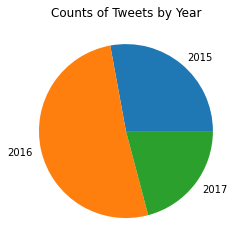

In [6]:
# Plotting a pie Chart for tweets count by year

yearly_count = twitter_clean.groupby('year')['tweet_id'].count()
plt.pie(yearly_count, labels = yearly_count.index)
plt.title('Counts of Tweets by Year')
plt.savefig('Pie2.png', dpi=150, bbox_inches='tight')
plt.show();

### 3. Most liked dog stage by favorite count of tweets

In [7]:
twitter_clean.groupby('dog_stage')['favorite_count'].sum().sort_values(ascending=False)

dog_stage
pupper     753026
doggo      592225
puppo      159740
floofer     40840
Name: favorite_count, dtype: int64

#### Insight:
- **Pupper** is the most liked dog_stage according the favourite count.

### Visualization

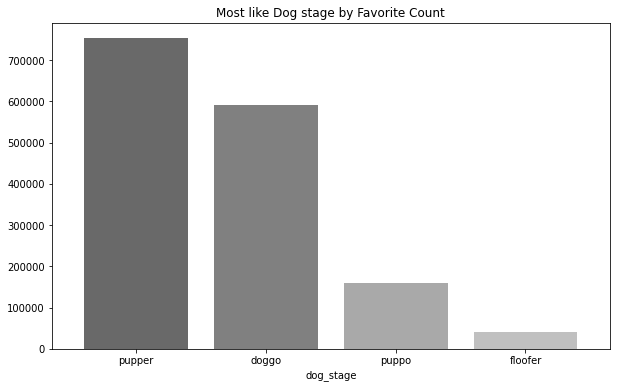

In [34]:
fav_stage =twitter_clean.groupby('dog_stage')['favorite_count'].sum().sort_values(ascending=False)
c = ['dimgray', 'gray', 'darkgray', 'silver','lightgrey']
fav_stage.plot(kind='bar', width=0.8, color=c, figsize=(10,6))
plt.title('Most like Dog stage by Favorite Count')
plt.xticks(rotation=0)
plt.savefig('MostLiked.png', dpi=150, bbox_inches='tight');

### 4. What breed of dog are the most commonly predicted for the first dog?

In [9]:
twitter_clean.p1.value_counts().head(5)

golden_retriever      91
Pembroke              64
Labrador_retriever    62
Chihuahua             59
pug                   39
Name: p1, dtype: int64

#### Insight:
- **Golden Retriever** is the most commonly predicted breed of dog for the first prediction.

### Visualization

In [10]:
twitter_clean.groupby('p1')['tweet_id'].count().sort_values(ascending=False).head()

p1
golden_retriever      91
Pembroke              64
Labrador_retriever    62
Chihuahua             59
pug                   39
Name: tweet_id, dtype: int64

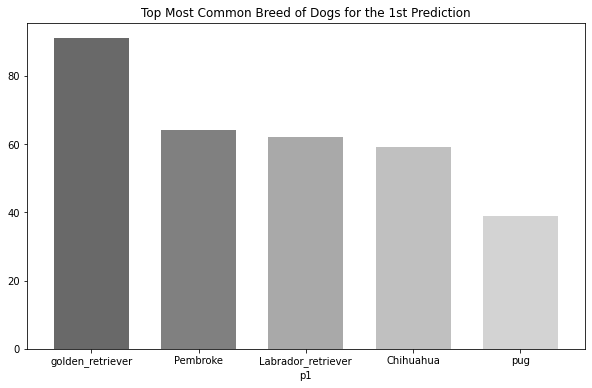

In [35]:
TopDogBreed = twitter_clean.groupby('p1')['tweet_id'].count().sort_values(ascending=False).head()
TopDogBreed.plot(kind='bar', width=0.7, figsize=(10,6), color=c)
plt.title('Top Most Common Breed of Dogs for the 1st Prediction')
plt.xticks(rotation=0)
plt.savefig('MostCommon.png', dpi=150, bbox_inches='tight');

### **5. Top most liked photos and the dog breed classification from first prediction?**

In [36]:
# Sorting the dataset to get data with highest favorite count

MostlikedPic = twitter_clean.sort_values('favorite_count', ascending=False).head()
MostlikedPic = MostlikedPic[['tweet_id', 'favorite_count', 'jpg_url', 'p1']]
MostlikedPic

tweet_id  favorite_count  \
443  807106840509214720          111226   
127  866450705531457537          108533   
216  879415818425184262           92523   
8    819004803107983360           82418   
236  870374049280663552           73729   

                                               jpg_url                p1  
443  https://pbs.twimg.com/ext_tw_video_thumb/80710...         Chihuahua  
127    https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg    French_bulldog  
216  https://pbs.twimg.com/ext_tw_video_thumb/87941...  English_springer  
8      https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg   standard_poodle  
236    https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg  golden_retriever

In [37]:
# Top 5 most liked photos and Dog Breed

MostlikedPic['p1']

443           Chihuahua
127      French_bulldog
216    English_springer
8       standard_poodle
236    golden_retriever
Name: p1, dtype: object

#### Insight:
- The photo with the highest favorite count is a photo of a **Chihuahua**.

### Visualization

In [46]:
import PIL.Image
from io import BytesIO
import requests
from IPython.display import display

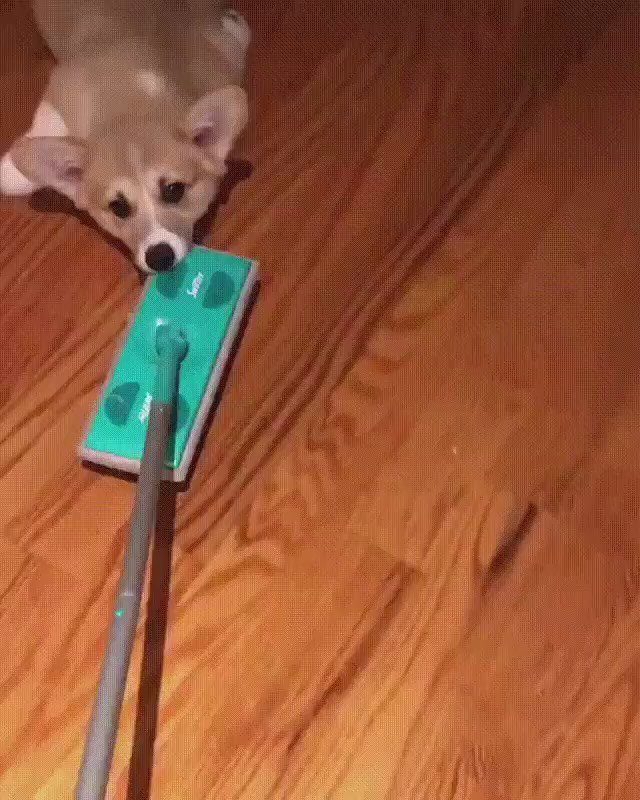

In [47]:
# The dog with most the liked photo - Chihuahua

url = twitter_clean.jpg_url[443]
r = requests.get(url)
img = Image.open(BytesIO(r.content))
display(img)
img.save('MostlikedDog.jpg')

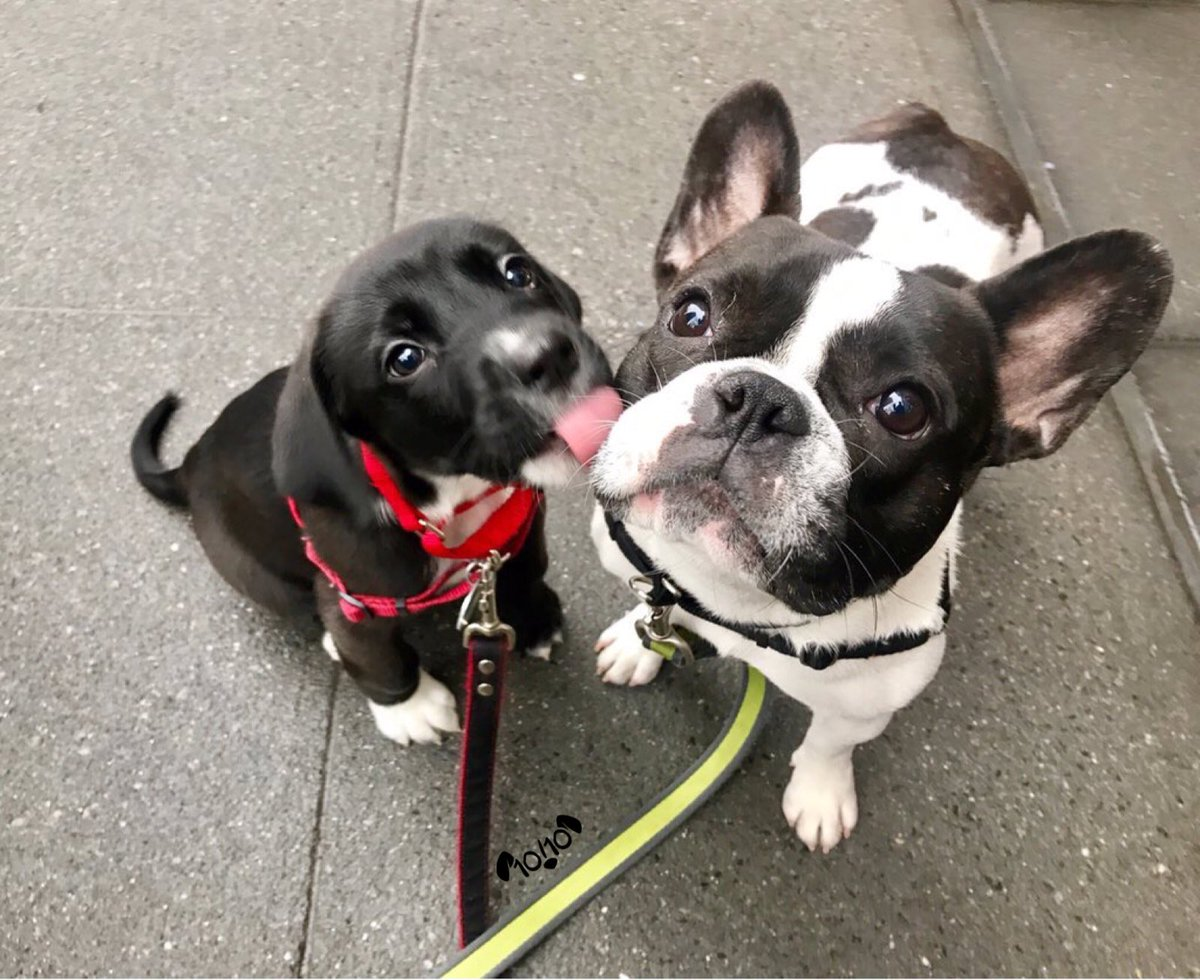

In [48]:
# Photo with the 2nd highest favorite count - French Bulldog 

url = twitter_clean.iloc[127]['jpg_url']
r = requests.get(url)
img2 = Image.open(BytesIO(r.content))
display(img2)
img2.save('2ndMostliked.jpg')

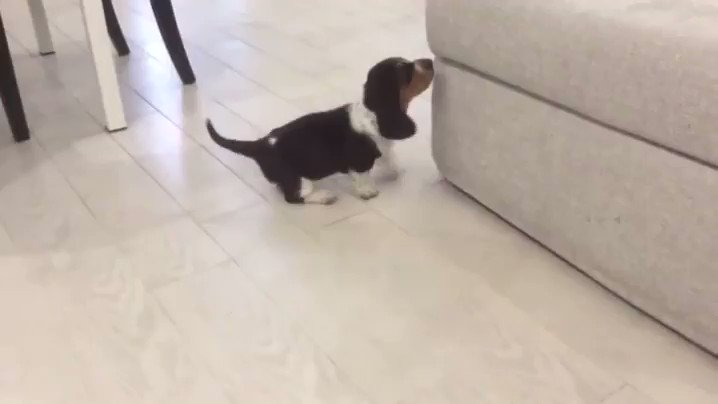

In [49]:
# Photo with the 3rd highest favorite count - English Springer

url = twitter_clean.jpg_url[216]
r = requests.get(url)
img3 = Image.open(BytesIO(r.content))
display(img3)
img3.save('3rdMostliked.jpg')

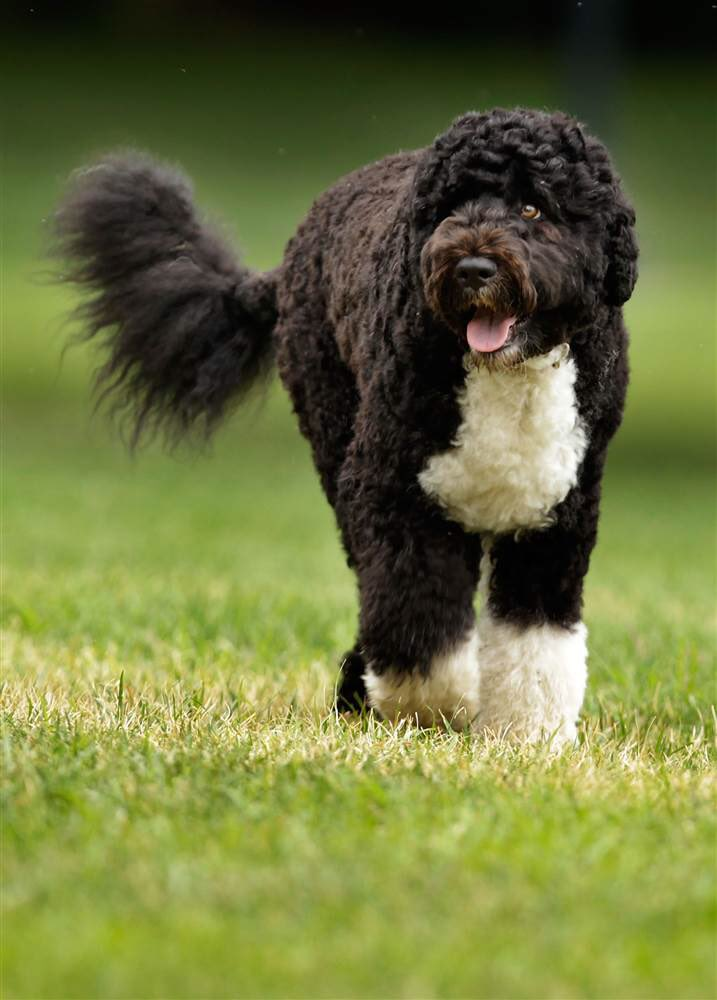

In [50]:
# Photo with the 5th highest favorite count - Standard Poodle

url = twitter_clean.iloc[8]['jpg_url']
r = requests.get(url)
img4 = Image.open(BytesIO(r.content))
display(img4)
img4.save('4thMostliked.jpg')

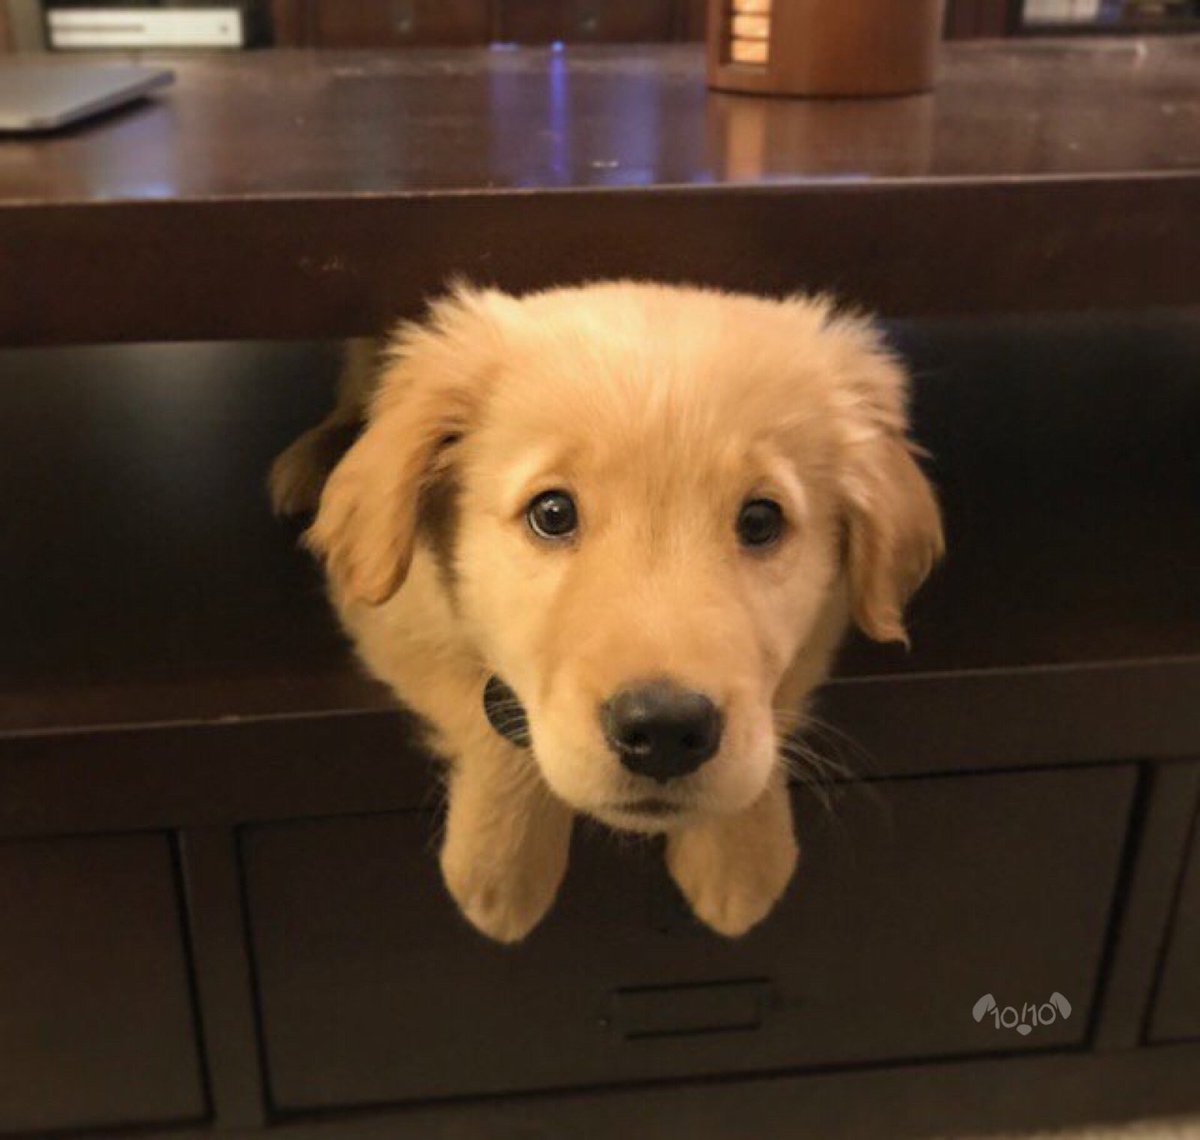

In [51]:
# Photo with the 5th highest favorite count - Golden Retriever 

url = twitter_clean.iloc[236]['jpg_url']
r = requests.get(url)
img5 = Image.open(BytesIO(r.content))
display(img5)
img5.save('5thMostliked.jpg')